## Hidden Layers

In this mission, we'll explore how **multi-layer networks** (also known as **deep neural networks**) are able to better capture nonlinearity in the data. In a deep neural network, the first layer of input neurons feeds into a second, intermediate layer of neurons. Here's a diagram representing this architecture:

![Jupyter](./two_layer_network.svg)

![Jupyter](./three_layer_network.svg)

We included both of the functions that are used to compute each hidden neuron and output neuron to help clear up any confusion. You'll notice that the number of neurons in the second layer was more than those in the input layer. **Choosing the number of neurons in this layer is a bit of an art form and not quite a science yet in neural network literature**. We can actually add more intermediate layers, and this often leads to improved model accuracy (because of an increased capability in learning nonlinearity).

![Jupyter](./three_layer_network.svg)


The intermediate layers are known as **hidden layers**, because they aren't directly represented in the input data or the output predictions. Instead, we can think of each hidden layer as intermediate features that are learned during the training process.

## Generating Data That Contains Nonlinearity

In [20]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_moons
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [5]:
data = make_moons(n_samples = 100, random_state = 3, noise=0.04)

In [6]:
features = pd.DataFrame(data[0])
labels = pd.Series(data[1])

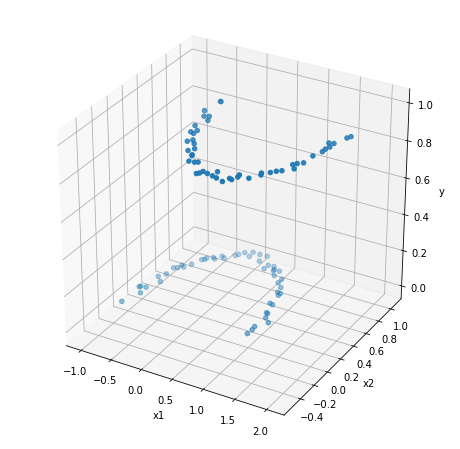

In [17]:
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(features[[0]], features[[1]], labels)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

plt.show()

## Hidden Layer With A Single Neuron

![Jupyter](./single_hidden_layer.svg)

This network contains two sets of weights that are learned during the training phase:

* 4 weights between the input layer and the hidden layer
* 1 weight between the hidden layer and the output layer

## Training A Neural Network Using Scikit-learn

Scikit-learn contains two classes for working with neural networks:

* MLPClassifier
* MLPRegressor

We can specify the activation function we want used in all layers using the activation parameter. This parameter accepts only the following string values:

* `'identity'`: the identity function
* `'logistic'`: the sigmoid function
* `'tanh'`: the hyperbolic tangent (tanh) function
* `'relu'`: the ReLU function

In [21]:
features["bias"] = 1

shuffled_index = np.random.permutation(features.index)
shuffled_data = features.loc[shuffled_index]
shuffled_labels = labels.loc[shuffled_index]
mid_length = int(len(shuffled_data)/2)
train_features = shuffled_data.iloc[0:mid_length]
test_features = shuffled_data.iloc[mid_length:len(shuffled_data)]
train_labels = shuffled_labels.iloc[0:mid_length]
test_labels = shuffled_labels.iloc[mid_length: len(labels)]

In [22]:
lr = LogisticRegression()
lr.fit(train_features, train_labels)


mlp = MLPClassifier(hidden_layer_sizes=(1,), activation='logistic')
mlp.fit(train_features, train_labels)


c:\users\test\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='logistic', hidden_layer_sizes=(1,))

In [23]:
nn_predictions = mlp.predict(test_features)

In [24]:
log_predictions = lr.predict(test_features)

In [25]:
log_accuracy = accuracy_score(test_labels, log_predictions)

nn_accuracy = accuracy_score(test_labels, nn_predictions)

In [26]:
print(log_accuracy)
print(nn_accuracy)

0.92
0.46


## Hidden Layer With Multiple Neurons

![Jupyter](./NeuralNetworkZo19High.png)

In [28]:
neurons = [1, 5, 10, 15, 20, 25]

accuracies = []

for neuron in neurons:
    mlp = MLPClassifier(hidden_layer_sizes=(neuron,), activation='logistic')
    mlp.fit(train_features, train_labels)
    nn_predictions = mlp.predict(test_features)
    nn_accuracy = accuracy_score(test_labels, nn_predictions)
    accuracies.append(nn_accuracy)

print(accuracies)

c:\users\test\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\test\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\test\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\test\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochasti

[0.46, 0.46, 0.78, 0.86, 0.86, 0.78]


c:\users\test\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


## Multiple Hidden Layers

In [ ]:
# Network with 2 hidden layers, 1 neuron in each hidden layer
# mlp = MLPClassifier(hidden_layer_sizes=(1,1), activation='logistic')

# Network with 3 hidden layers of varying neuron counts in each hidden layer
# mlp = MLPClassifier(hidden_layer_sizes=(2,6,10), activation='logistic')

In [29]:
neurons = [1, 5, 10, 15, 20, 25]

nn_accuracies = []

for neuron in neurons:
    mlp = MLPClassifier(hidden_layer_sizes=(neuron, neuron), activation='relu', max_iter=1000)
    mlp.fit(train_features, train_labels)
    nn_predictions = mlp.predict(test_features)
    nn_accuracy = accuracy_score(test_labels, nn_predictions)
    nn_accuracies.append(nn_accuracy)

print(nn_accuracies)

c:\users\test\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\test\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[0.46, 0.98, 1.0, 1.0, 1.0, 1.0]


In [30]:
mlp = MLPClassifier(hidden_layer_sizes=(15, 15), activation='relu', max_iter=1000)
mlp.fit(train_features, train_labels)
nn_predictions = mlp.predict(test_features)
nn_accuracy = accuracy_score(test_labels, nn_predictions)

In [31]:
print(nn_accuracy)

1.0


In [45]:
mlp.coefs_

[array([[-5.92405242e-01,  1.14330502e+00, -2.48128165e-01,
          2.43491581e-04,  2.66150890e-01,  5.96157377e-01,
          7.99392259e-01, -2.05508760e-03,  9.08355324e-03,
          8.83522736e-01,  1.33945762e+00, -5.38301011e-01,
         -2.19388072e-01,  8.11419734e-01,  9.39337499e-01],
        [ 7.89538358e-01,  3.17378000e-01,  3.24717625e-01,
         -2.19832666e-20,  3.59424947e-01, -6.33225243e-01,
         -5.57103527e-02, -5.28535997e-20, -1.95285649e-02,
         -3.08566447e-01,  4.52759538e-01,  5.95540361e-01,
          3.64966307e-01, -5.43697039e-01, -5.01690638e-01],
        [ 5.63766027e-01,  2.98607586e-01,  6.11511801e-01,
         -1.07720022e-03,  2.66691792e-01,  4.24677882e-01,
          8.30174730e-02, -1.58073451e-03, -2.39425465e-02,
         -5.99520786e-01,  3.39921013e-01,  4.61288778e-01,
          4.75683060e-01, -9.72804461e-02,  4.90707460e-01]]),
 array([[-4.81706667e-01, -3.14430286e-01,  5.86086562e-01,
         -9.13369080e-22, -4.042859

In [37]:
features.shape

(100, 3)